# Module Assessment

### Setup

Import required packages for effective operation of notebook

In [ ]:
# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data - yFinance (https://github.com/ranaroussi/yfinance)
import yfinance as yf

# Plots
import numpy as np

# Creating plots
import matplotlib.pyplot as plt

# IPython


### Assessment Tasks

1. Write a function titled get_data() to download previous 5 days for the FAANG stocks
2. Plot the data for each stock
3. Write faang.py script to perform task 1 and 2
4. Create GitHub Actions workflow to run script faang.yml every Saturday morninng

#### Problem 1. Funtion Creation

To create the 'get_data' function, '''yf.download''' will be used, with certain parameters specified, to align with the 5 day look back.

In [35]:
# Use yf.download to download hourly data over previos 5 days
#Source: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

# Show first 5 lines of the results
get_data.head()

/tmp/ipykernel_2003/3428256576.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-10 14:30:00+00:00  271.856995  248.029999  288.720001  633.837402   
2025-11-10 15:30:00+00:00  269.066406  246.380005  286.965515  630.409973   
2025-11-10 16:30:00+00:00  269.079987  247.104996  287.309998  633.864990   
2025-11-10 17:30:00+00:00  269.730011  248.630005  288.839996  632.840027   
2025-11-10 18:30:00+00:00  269.660004  248.769897  291.100006  632.780029   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-10 14:30:00+00:00  1124.795044  273.730011  251.750000  290.429993   
2025-11-10 15:30:00+00:00  1116.630005  271.989990  248.089996  289.269897   
2025-11-10 16:30:00+00:00  1116.839844  269.758789  247.445007  287.579987   
2025-11-10 17:30:00+00:00  1115.630005  270.230011  248.899994  289.329987   
2025-11-10 18:30:00+00:00  1115.599976  270.307709  248.956406  291.429993   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-10 14:30:00+00:00  634.960022  1128.189941  ...  268.950012   
2025-11-10 15:30:00+00:00  633.880005  1127.155029  ...  271.829987   
2025-11-10 16:30:00+00:00  634.460022  1122.250000  ...  269.040009   
2025-11-10 17:30:00+00:00  635.000000  1118.727173  ...  269.070007   
2025-11-10 18:30:00+00:00  634.650024  1118.180054  ...  269.709991   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-10 14:30:00+00:00  248.309998  285.209991  631.390015  1107.099976   
2025-11-10 15:30:00+00:00  248.021194  288.704987  633.630005  1124.800049   
2025-11-10 16:30:00+00:00  246.339996  286.945007  630.409973  1116.630005   
2025-11-10 17:30:00+00:00  247.104996  287.339996  633.929993  1116.666382   
2025-11-10 18:30:00+00:00  248.653000  288.869995  632.840027  1115.650024   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-11-10 14:30:00+00:00  7030981  7213922  4164797  3873187  720526  
2025-11-10 15:30:00+00:00  3083676  3238084  1570763  1532229  257424  
2025-11-10 16:30:00+00:00  2346213  2393779   892605  1088389  175811  
2025-11-10 17:30:00+00:00  1807442  1959822   743976   879505  162437  
2025-11-10 18:30:00+00:00  3188667  1461943  1315791   781607  171050  

[5 rows x 25 columns]

Given the above code can be seen to pull the requested dates; previous 5 days with 1 hour intervals, the following code can then be used to save the information with the required naming convention.

In [36]:
# Use datetime module to confirm current time.
# Source: https://docs.python.org/3/library/datetime.html#format-codes

now = dt.datetime.now()

# Show output
now


datetime.datetime(2025, 11, 16, 16, 51, 44, 82277)

This now needs to be converted into a string, and can be done so using '''now.strftime'''
https://www.w3schools.com/python/python_datetime.asp

In [37]:
# Convert date and time into string specifying:
# %Y - for year
# %m - for month

now.strftime('%Y%m%d-%H%M%S')

'20251116-165144'

Merging the above 2 codes will generate the exact time the code is ran, and capture it in a string format. 

In [38]:
# Capture date and time code is ran, and present as a string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Show
time_stamp

'20251116-165144'

This can then be expanded to be used as the filename, along with specifying the location for the file to be saved.

In [39]:
# File location is the 'data' folder, and will be a .csv file.
'../data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

'../data/20251116-165144.csv'

All can now be pulled together to save the previous 5 days for the given stocks.

In [40]:
# Save download as a .csv file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

# Pull previous 5 days of data
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h', auto_adjust=True)

# Generate time stamp of when data was pulled
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Save into 'data' folder, titling file with time stamp
get_data.to_csv('data/' + time_stamp + '.csv')

[*********************100%***********************]  5 of 5 completed


### Problem 2: Plotting the Data

First step is to retreive the data from the latest file in the 'data' folder. This can be done by firstly specifying the directory location (`datadir`), an then chosing the correct filename.

In [41]:
# Specify data folder as location to find the file.
datadir = './data/'

# Specify the filename, which is the same time stamp as when the data is pulled.
filename=f'{time_stamp}.csv'

The CSV file can then be pulled in and plotted.

In [42]:
# Read in the CSV file
df= pd.read_csv(datadir + filename)

#show first 5 rows
df.head()

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-11-10 14:30:00+00:00,271.85699462890625,248.02999877929688,288.7200012207031,633.83740234375,1124.7950439453125,273.7300109863281,251.75,290.42999267578125,634.9600219726562,...,268.95001220703125,248.30999755859375,285.2099914550781,631.3900146484375,1107.0999755859375,7030981,7213922,4164797,3873187,720526
3,2025-11-10 15:30:00+00:00,269.06640625,246.3800048828125,286.96551513671875,630.4099731445312,1116.6300048828125,271.989990234375,248.08999633789062,289.2698974609375,633.8800048828125,...,271.8299865722656,248.0211944580078,288.7049865722656,633.6300048828125,1124.800048828125,3083676,3238084,1570763,1532229,257424
4,2025-11-10 16:30:00+00:00,269.0799865722656,247.10499572753906,287.30999755859375,633.864990234375,1116.83984375,269.7587890625,247.44500732421875,287.5799865722656,634.4600219726562,...,269.0400085449219,246.33999633789062,286.94500732421875,630.4099731445312,1116.6300048828125,2346213,2393779,892605,1088389,175811


The above can be seen to have multiple column names which won't be able to be plotted. To do this, the CSV file needs to be read in, specifying the first 2 rows as the columns.

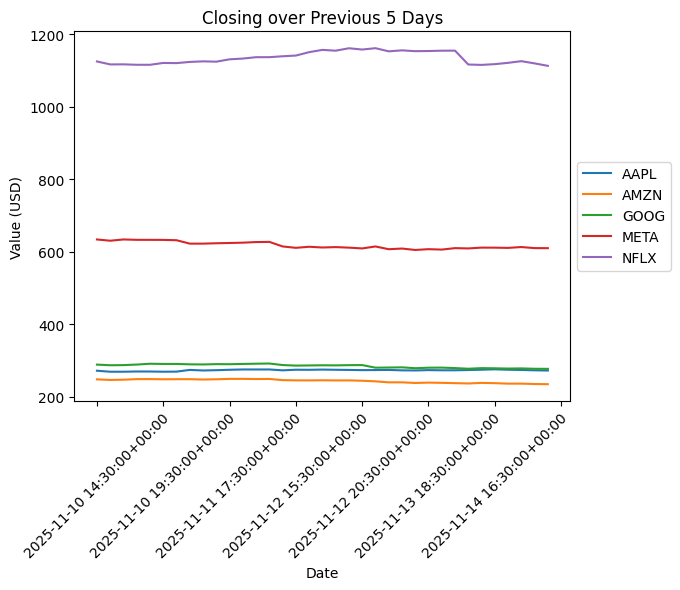

In [43]:
# Read in the CSV file
# 'header=[0,1]' species the use of row 0 and 1 as the column names
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df= pd.read_csv(datadir + filename, index_col=0, header=[0,1])

# Plot the 'close' data and adjust visuals.
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot_data = df['Close'].plot(title = 'Closing over Previous 5 Days', xlabel='Date', ylabel='Value (USD)')

# Rotate x-axis lables 45°
plt.xticks(rotation=45)

# Move legend off chart area
# Source: https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
plot_data.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Save plot into 'plots' folder
plt.savefig('plots/' + time_stamp)

### Problem 3: Create Script

For the script, `faang.py` was created in the main repository. Within this, the above three code lines were copied over:
- The first to pull the 5 day, hourly data for each of the stock.
- The second line to generate a timestamp of when ran.
- The final line to save the data into the `data` folder.

To run each of these, specific packages are also needed, so these too were added to the `faang.py` code:
- `yfinance` to pull the required stock data.
- `datetime` to create the timestamp.

This results in the below code.

```python

import datetime as dt

import yfinance as yf

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

get_data.to_csv('data/' + time_stamp + '.csv')

```

This `faang.py` code can be ran as normal using `python faang.py` in the main terminal however, to have the code operate when the user types `./faang.py`, firstly a shebang line (`#! /usr/bin/env python`) needs to be added to the very beginning of the code.

By adding the shebang line, it specifies the path to Python and means the user does not have to type `python` before the script name [source](https://realpython.com/python-shebang/).

One final check to ensure the script functions is to allow the file have permission to execute. To do so, in the same location where the `faang.py` script is located, in the terminal `chmod u+x faang.py` was ran. This changes the script to allow the user `u` to execute `x` the script.

To ensure this worked, `ls -l faang.py` was ran in the terminal. It outputted below, confimring it is executable given the `x` in `rwx`. 

```-rwxrw-rw- 1 codespace codespace 495 Nov  7 13:59 faang.py```

The script can now be ran in the terminal by simply typing `./faang.py`.

# End